#### ADMN 5016 Machine Learning Project
#### Field-Bounded Crop Type Classification

### Decision Tree Classification

In [21]:
## Initialize Libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from tqdm import tqdm
from  io import StringIO
import pydotplus
import graphviz
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools

In [18]:
## Define Decision Tree Functions
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

def plot_tree(model,filename = "tree.png"):
    #global churn_df 

    dot_data = StringIO()
  

    featureNames = [colunm  for colunm in crop_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']].columns]
    out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= ['left','stay'], filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')
    
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()
    
     
    

In [19]:
## Define Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
## Load the CSV file
data_file = 'https://raw.githubusercontent.com/db-bangs/A5016/main/d20130924_refl_ndvi_sk.csv'
crop_data = pd.read_csv(data_file, sep = ",")
crop_data.head()

,X,V1,V2,V3,V4,V5,V6,V7,V8,Crop,NDVI_sd,NDVI_kt,NDVI_sk,NDVI
0,1,0.08029,0.06889,0.05869,0.06374,0.10378,0.00082,0.12382,0.09167,Soybeans,0.007589,-0.652732,0.199005,0.238687
1,2,0.07644,0.06332,0.05888,0.04370,0.20840,0.00084,0.12492,0.06994,Corn,0.047886,0.441504,-0.213983,0.656629
2,3,0.07460,0.06156,0.05488,0.04416,0.18868,0.00096,0.11252,0.06026,Soybeans,0.075923,2.905492,-1.653555,0.619788
3,4,0.07514,0.06348,0.05306,0.05266,0.11797,0.00088,0.12423,0.08217,Corn,0.063182,-0.995496,-0.037232,0.380169
4,5,0.08060,0.06930,0.05936,0.06480,0.10532,0.00088,0.12530,0.09204,Soybeans,0.010109,-0.441190,0.433803,0.237682


In [5]:
crop_data.shape

(928, 14)

In [6]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        928 non-null    int64  
 1   V1       928 non-null    float64
 2   V2       928 non-null    float64
 3   V3       928 non-null    float64
 4   V4       928 non-null    float64
 5   V5       928 non-null    float64
 6   V6       928 non-null    float64
 7   V7       928 non-null    float64
 8   V8       928 non-null    float64
 9   Crop     928 non-null    object 
 10  NDVI_sd  928 non-null    float64
 11  NDVI_kt  928 non-null    float64
 12  NDVI_sk  928 non-null    float64
 13  NDVI     928 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 101.6+ KB


In [7]:
crop_data.describe()

,X,V1,V2,V3,V4,V5,V6,V7,V8,NDVI_sd,NDVI_kt,NDVI_sk,NDVI
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,464.500000,0.076036,0.063659,0.056795,0.051032,0.169794,0.000874,0.122631,0.074797,0.049384,1.759221,-0.079885,0.496791
std,268.034824,0.003748,0.005075,0.005848,0.014016,0.060071,0.000079,0.021983,0.025037,0.046034,7.239673,1.315019,0.202607
min,1.000000,0.070460,0.055960,0.045130,0.026180,0.080540,0.000700,0.080260,0.034780,0.002546,-1.959873,-8.894867,0.177950
25%,232.750000,0.073080,0.059542,0.053060,0.038915,0.118252,0.000820,0.104955,0.052910,0.018497,-0.603992,-0.676557,0.289876
50%,464.500000,0.075015,0.062820,0.055730,0.050535,0.155300,0.000860,0.121580,0.071655,0.035739,-0.035500,-0.109745,0.520237
75%,696.250000,0.078320,0.066600,0.059137,0.062227,0.210570,0.000920,0.135590,0.093765,0.061977,1.328060,0.476836,0.686082
max,928.000000,0.093840,0.087110,0.085400,0.102100,0.390620,0.001180,0.224000,0.164000,0.304040,106.891697,9.757025,0.870163


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>],
       [<AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>,
        <AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>],
       [<AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'NDVI_sd'}>,
        <AxesSubplot:title={'center':'NDVI_kt'}>,
        <AxesSubplot:title={'center':'NDVI_sk'}>],
       [<AxesSubplot:title={'center':'NDVI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

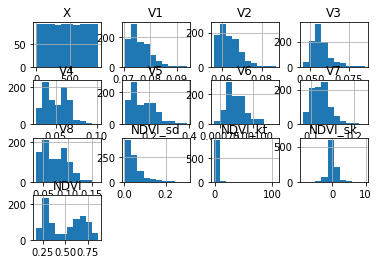

In [8]:
crop_data.hist()

#### Classification: Reflectance Bands Only

training data size: 618
testing data size: 310
Confusion matrix, without normalization
[[121   4   4]
 [  9  74  14]
 [ 16   0  37]]


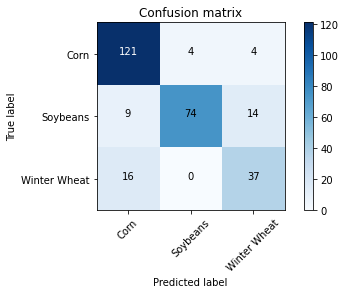

In [22]:
# Define X predictors - Reflectance Data Only
X = crop_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
X.head()

# Define y crops
y = crop_data[['Crop']]
y.head()

# Partition Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

## Build a Tree with Max Depth of 5
max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

## Predict Class on the Testing Data
yhat = Tree.predict(X_test)

## Calculate Accuracy of Classification
get_accuracy(X_train, X_test, y_train, y_test,  Tree)

target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')

#### Classification: 5 Bands + NDVI

In [10]:
# Define X predictors - 5 Bands + NDVI
X = crop_data[['V1', 'V2', 'V3', 'V6', 'V7', 'NDVI']]
X.head()

# Define y crops
y = crop_data[['Crop']]
y.head()

# Partition Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

## Build a Tree with Max Depth of 5
max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

## Predict Class on the Testing Data
yhat = Tree.predict(X_test)

## Calculate Accuracy of Classification
get_accuracy(X_train, X_test, y_train, y_test,  Tree)

training data size: 618
testing data size: 310


{'test Accuracy': 0.8172043010752689, 'train Accuracy': 0.8705701078582434}

#### Classification: 5 Bands + NDVI + Skew

In [11]:
## Classify using NDVI and skewness and non-NDVI Bands
# Define X predictors
X = crop_data[['V1', 'V2', 'V3', 'V6', 'V7', 'NDVI', 'NDVI_sk']]
y = crop_data[['Crop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

yhat = Tree.predict(X_test)
yhat

get_accuracy(X_train, X_test, y_train, y_test,  Tree)

training data size: 618
testing data size: 310


{'test Accuracy': 0.8100358422939068, 'train Accuracy': 0.8736517719568567}

#### Classification: NDVI + Skew

In [12]:
## Classify using NDVI and skewness
# Define X predictors - NDVI and NDVI Skewness Only
X = crop_data[['NDVI', 'NDVI_sk']]
y = crop_data[['Crop']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

yhat = Tree.predict(X_test)

get_accuracy(X_train, X_test, y_train, y_test,  Tree)

training data size: 618
testing data size: 310


{'test Accuracy': 0.7598566308243727, 'train Accuracy': 0.7519260400616333}

In [ ]:
#plot_tree(filename = "tree.png",model=Tree)

In [13]:
crop_data['Crop Int'] = crop_data['Crop'].replace(to_replace=['Corn', 'Soybeans', 'Winter Wheat'], value = [0,1,2])

X = crop_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
y = crop_data[['Crop Int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)

print(y_train)

     Crop Int
186         1
346         0
451         0
622         0
738         0
..        ...
835         2
192         2
629         2
559         0
684         1

[618 rows x 1 columns]


In [ ]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 5,random_state=2),n_estimators=30,random_state=0,bootstrap=True)

In [ ]:
Bag.fit(X_train,y_train.values.ravel())

In [ ]:
Bag.predict(X_test)

In [ ]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

In [ ]:
get_accuracy_bag(X, y.values.ravel(), "Crop Type Classification")

#### Random Forest

In [32]:
n_estimators=100

M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)
model.fit(X_train,y_train.values.ravel())

yhat = model.predict(X_test)
yhat

print(get_accuracy(X_train, X_test, y_train, y_test, model)) 

{'test Accuracy': 0.8709677419354839, 'train Accuracy': 1.0}


Confusion matrix, without normalization
[[125   0   5]
 [ 10  77   9]
 [ 11   1  41]]


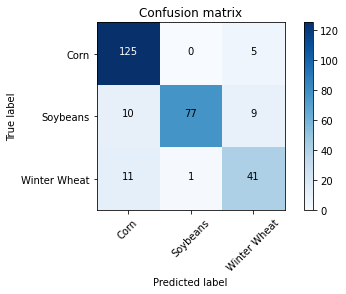

In [33]:
target_names = ['Corn', 'Soybeans', 'Winter Wheat']
plot_confusion_matrix(confusion_matrix(yhat,y_test),
                      classes=target_names,title='Confusion matrix')